In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [41]:
df1 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO1_N1_phase_10_out.csv")
df2 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO1_N2_phase_10_out.csv")

In [42]:
df1.head()

,Station,SN,Operator,Phase,SFR_110lp_60IH_TL_H,SFR_110lp_60IH_BR_V,SFR_110lp_30IH_BL_V,SFR_110lp_60IH_TR_V,SFR_110lp_80IH_BL_H,SFR_110lp_80IH_BL_V,...,SFR_110lp_80IH_BR_V,SFR_110lp_80IH_BR_H,SFR_110lp_Center_H,SFR_110lp_60IH_BL_V,corner_balance_IH80_H,SFR_110lp_80IH_TL_H,SFR_110lp_30IH_BR_V,SFR_110lp_30IH_BR_H,SFR_110lp_80IH_TL_V,corner_balance_IH80_V
0,G501_COMBO1_N1,91MBA01772,OP1,FrontSfrTestInfCollect,0.5879,0.6261,0.6872,0.6467,0.4604,0.5650,...,0.5386,0.4927,0.7091,0.6317,0.1135,0.4807,0.6835,0.6622,0.5435,0.0467
1,G501_COMBO1_N1,91MBA01772,OP1,FrontSfrTestInfCollect,0.5955,0.6273,0.6950,0.6453,0.4593,0.5655,...,0.5460,0.4997,0.7023,0.6307,0.1189,0.4735,0.6890,0.6554,0.5437,0.0385
2,G501_COMBO1_N1,91MBA01772,OP1,FrontSfrTestInfCollect,0.6001,0.6234,0.6929,0.6409,0.4644,0.5595,...,0.5517,0.4925,0.7096,0.6236,0.1040,0.4725,0.6846,0.6657,0.5459,0.0243
3,G501_COMBO1_N1,91MBA01772,OP2,FrontSfrTestInfCollect,0.5913,0.6194,0.6959,0.6375,0.4576,0.5677,...,0.5426,0.4902,0.7059,0.6237,0.1071,0.4557,0.6847,0.6660,0.5412,0.0467
4,G501_COMBO1_N1,91MBA01772,OP2,FrontSfrTestInfCollect,0.5936,0.6169,0.6927,0.6386,0.4506,0.5663,...,0.5381,0.4884,0.7058,0.6357,0.1284,0.4483,0.6790,0.6608,0.5406,0.0505


In [44]:
df=pd.concat([df1, df2])
# df.info()
dfgroup=df.groupby(['Station', 'SN', 'Phase']).mean()
# dfgroup.R_ROI9.plot()

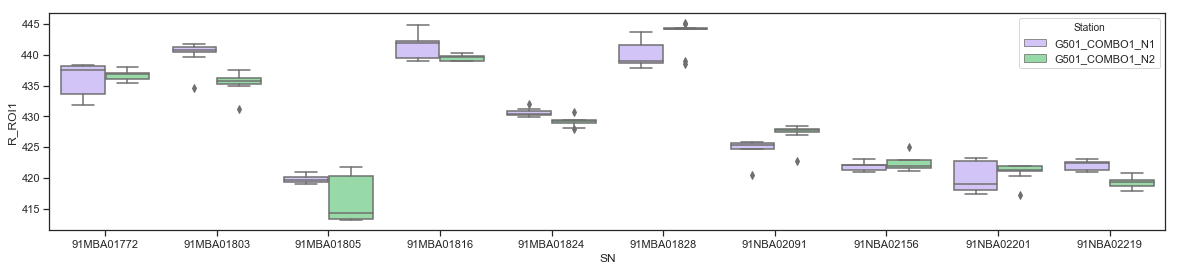

In [43]:
sns.set(style="ticks", palette="pastel")
plt.figure(figsize=(20, 4))
sns.boxplot(x="SN", y="R_ROI1",
            hue="Station", palette=["m", "g"],
            data=df)

In [51]:
sns.set_style("darkgrid")
# sns.set_style("whitegrid")
for element in df.columns[4:]:
    print element
    plt.figure(figsize=(20, 8))
    sns.boxplot(x="SN", y=element,
            hue="Station", palette=["b", "r"],
            data=df)
    plt.savefig(element+'.png', dpi=300)
    plt.close()

SFR_110lp_60IH_TL_H
SFR_110lp_60IH_BR_V
SFR_110lp_30IH_BL_V
SFR_110lp_60IH_TR_V
SFR_110lp_80IH_BL_H
SFR_110lp_80IH_BL_V
SFR_110lp_30IH_BL_H
SFR_110lp_60IH_TR_H
SFR_110lp_60IH_BR_H
SFR_110lp_60IH_TL_V
SFR_110lp_30IH_TR_H
SFR_110lp_30IH_TL_V
SFR_110lp_80IH_TR_V
SFR_110lp_80IH_TR_H
SFR_110lp_30IH_TL_H
SFR_110lp_30IH_TR_V
SFR_110lp_60IH_BL_H
SFR_110lp_Center_V
SFR_110lp_80IH_BR_V
SFR_110lp_80IH_BR_H
SFR_110lp_Center_H
SFR_110lp_60IH_BL_V
corner_balance_IH80_H
SFR_110lp_80IH_TL_H
SFR_110lp_30IH_BR_V
SFR_110lp_30IH_BR_H
SFR_110lp_80IH_TL_V
corner_balance_IH80_V


In [57]:
newdf = df.groupby(['Station', 'SN']).agg(['mean', 'std', 'max', 'min'])
newdf.reset_index(inplace=True)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 114 entries, (Station, ) to (corner_balance_IH80_V, min)
dtypes: float64(112), object(2)
memory usage: 17.9+ KB


In [60]:
iris = sns.load_dataset("iris")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
newdf1 = df1.groupby(['Station', 'SN']).mean()
newdf1.reset_index(inplace=True)
# print(newdf1.SFR_110lp_60IH_TL_H)
newdf2 = df2.groupby(['Station', 'SN']).mean()
newdf2.reset_index(inplace=True)
print(200.*(newdf1.SFR_110lp_60IH_TL_H-newdf2.SFR_110lp_60IH_TL_H)/(newdf1.SFR_110lp_60IH_TL_H+newdf2.SFR_110lp_60IH_TL_H))

0    0.056126
1   -0.113668
2    0.051857
3   -0.743663
4    0.604376
5   -0.875480
6   -2.384504
7   -0.597428
8    0.488322
9   -2.885024
Name: SFR_110lp_60IH_TL_H, dtype: float64


SFR_110lp_60IH_TL_H
SFR_110lp_60IH_BR_V
SFR_110lp_30IH_BL_V
SFR_110lp_60IH_TR_V
SFR_110lp_80IH_BL_H
SFR_110lp_80IH_BL_V
SFR_110lp_30IH_BL_H
SFR_110lp_60IH_TR_H
SFR_110lp_60IH_BR_H
SFR_110lp_60IH_TL_V
SFR_110lp_30IH_TR_H
SFR_110lp_30IH_TL_V
SFR_110lp_80IH_TR_V
SFR_110lp_80IH_TR_H
SFR_110lp_30IH_TL_H
SFR_110lp_30IH_TR_V
SFR_110lp_60IH_BL_H
SFR_110lp_Center_V
SFR_110lp_80IH_BR_V
SFR_110lp_80IH_BR_H
SFR_110lp_Center_H
SFR_110lp_60IH_BL_V
corner_balance_IH80_H
SFR_110lp_80IH_TL_H
SFR_110lp_30IH_BR_V
SFR_110lp_30IH_BR_H
SFR_110lp_80IH_TL_V
corner_balance_IH80_V


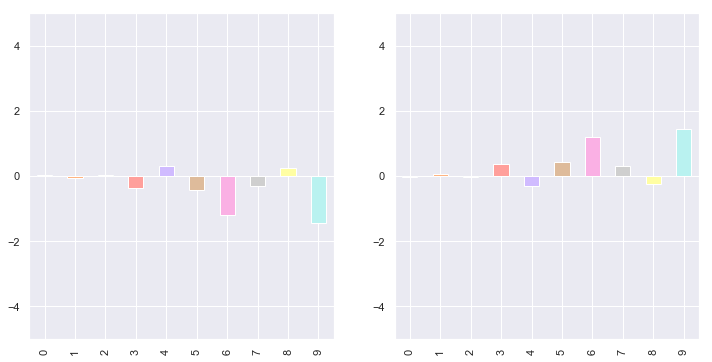

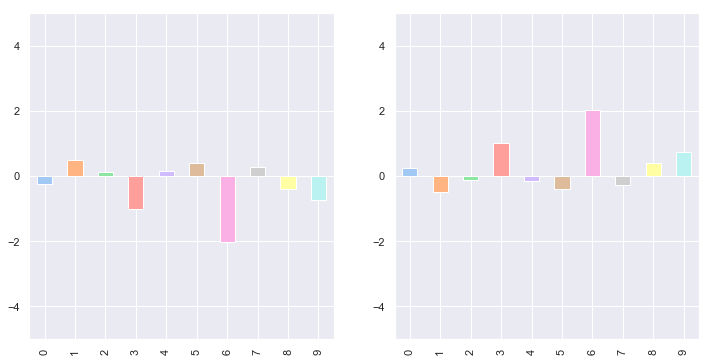

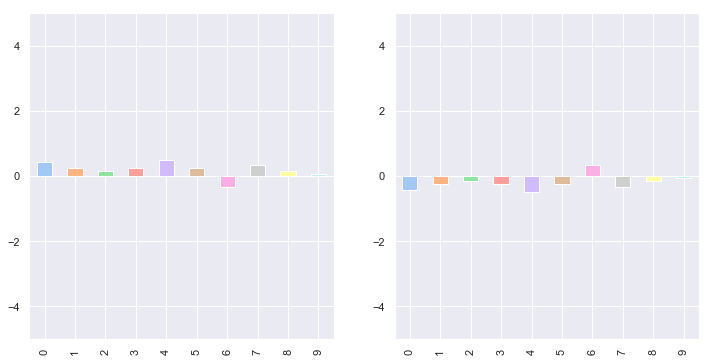

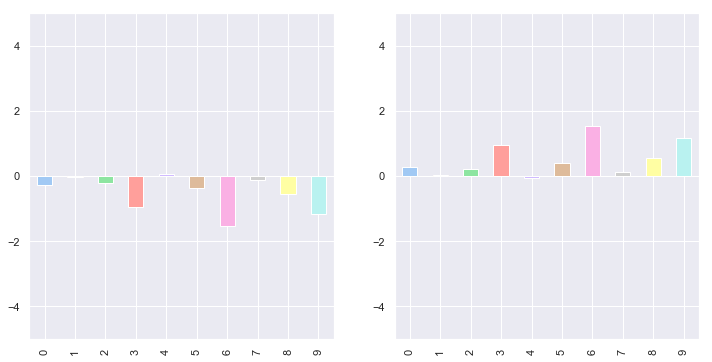

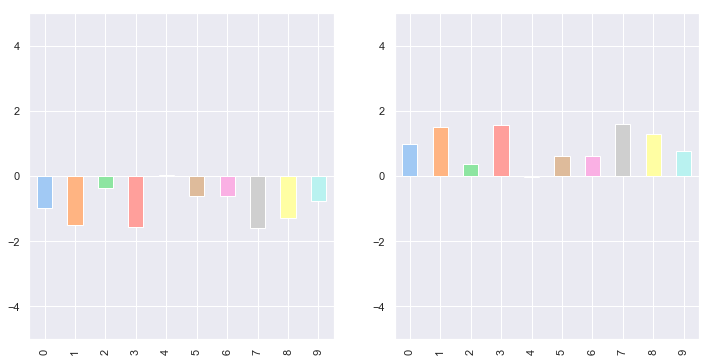

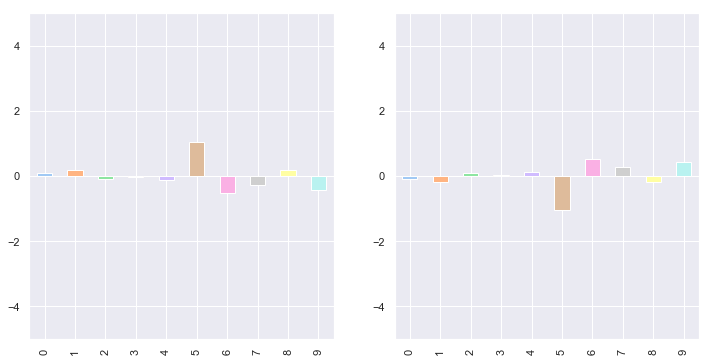

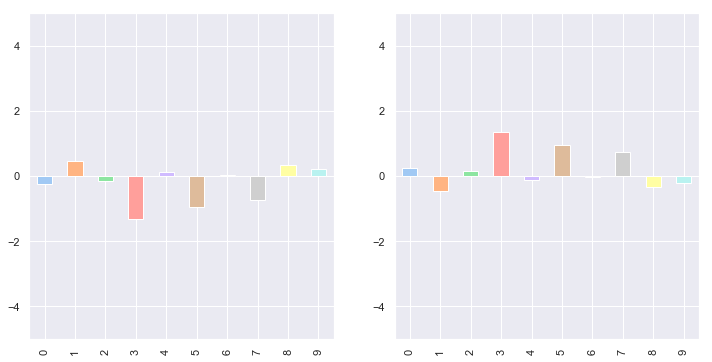

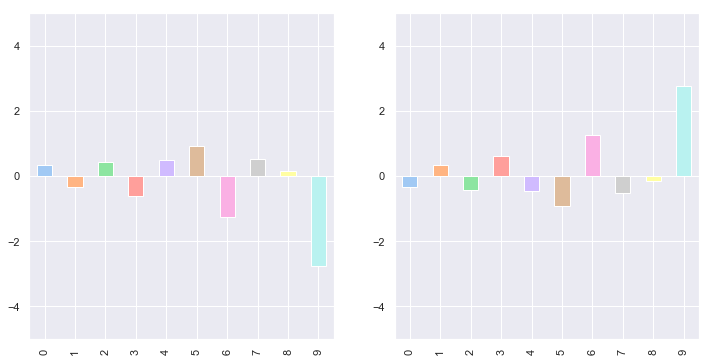

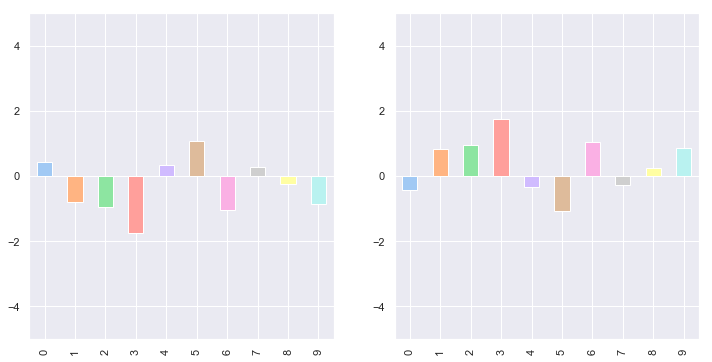

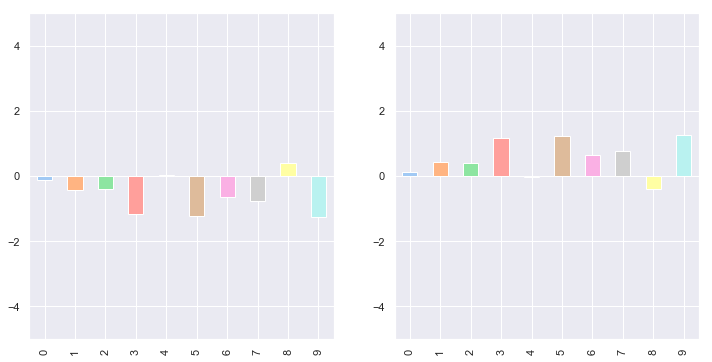

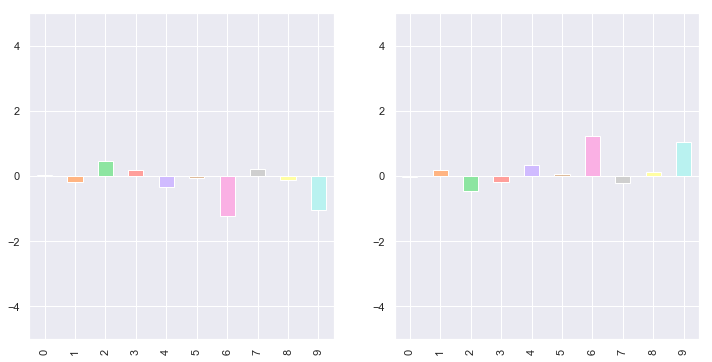

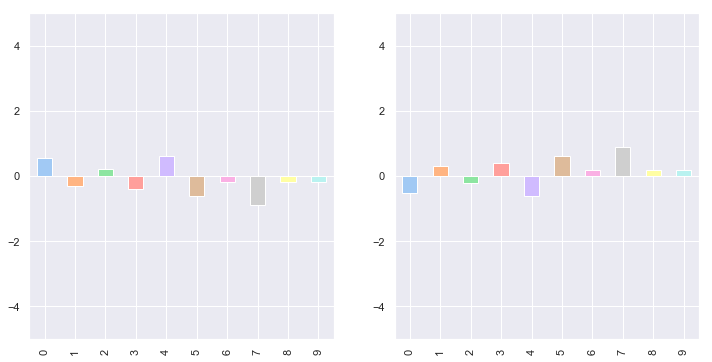

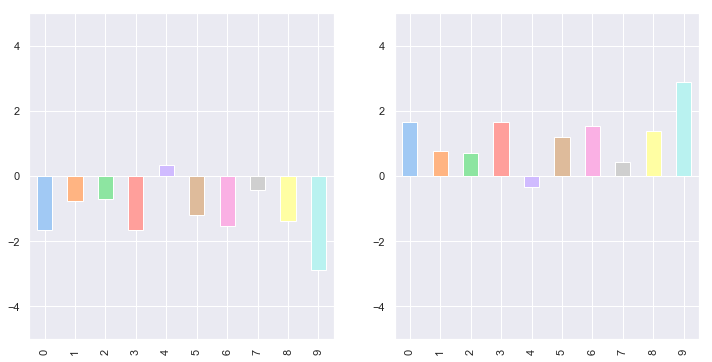

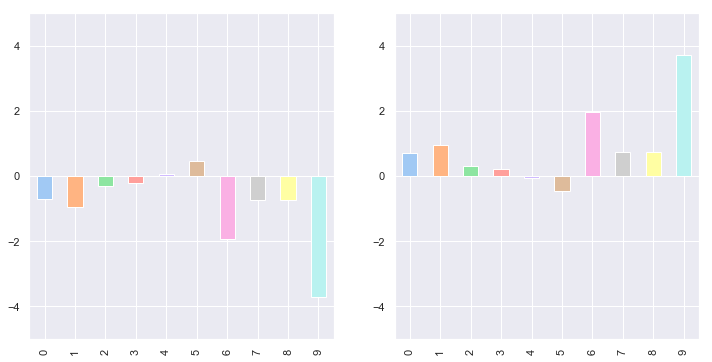

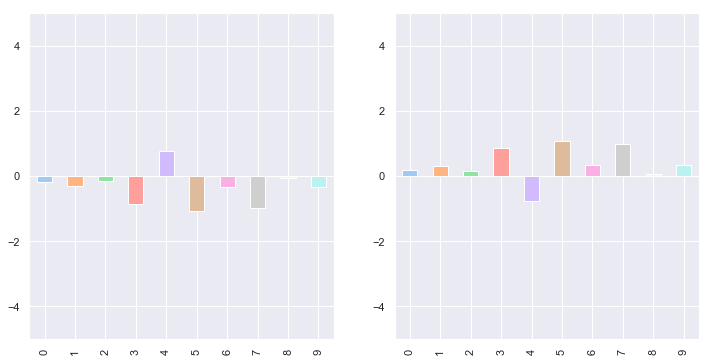

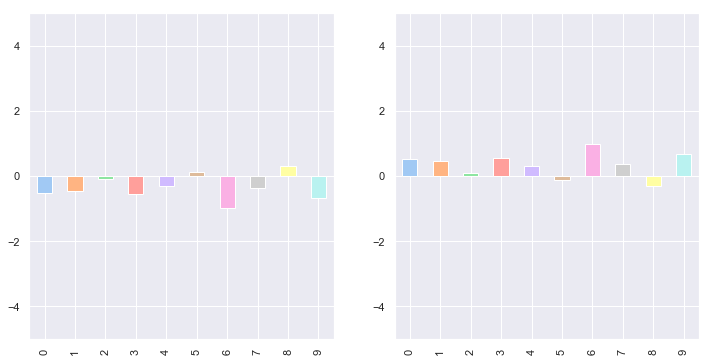

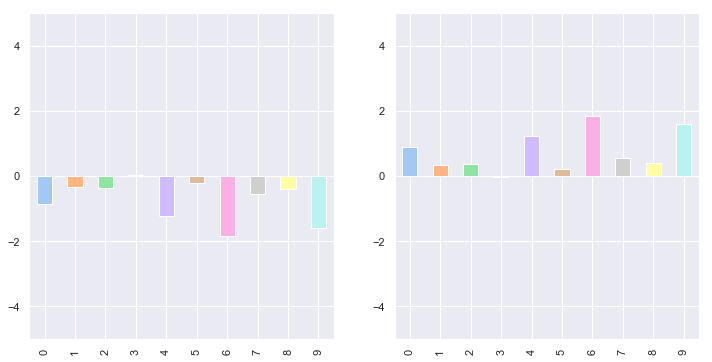

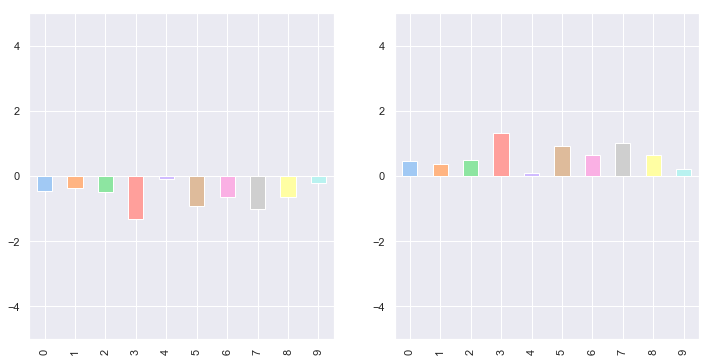

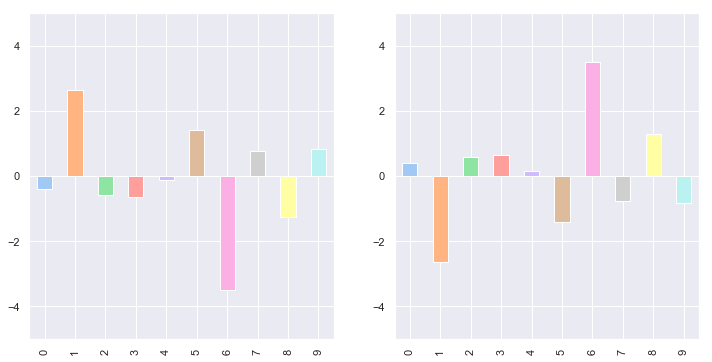

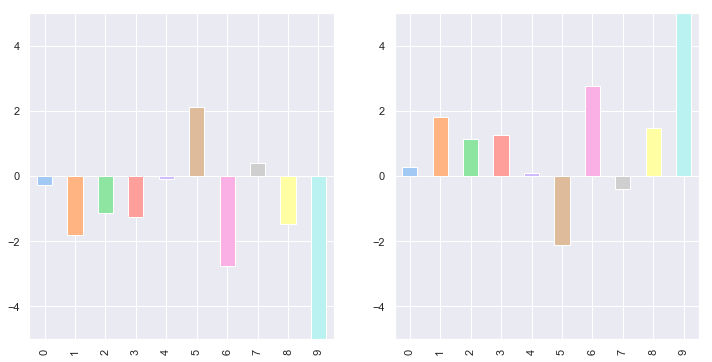

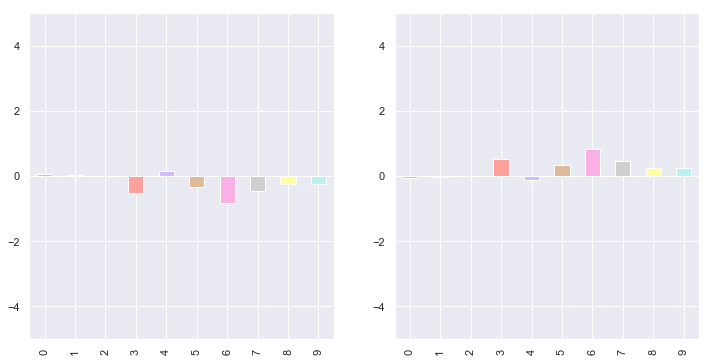

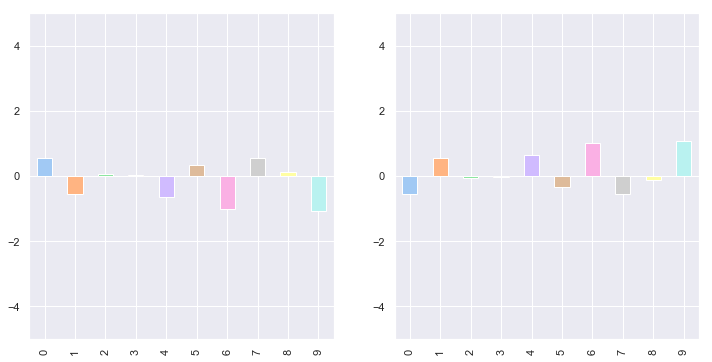

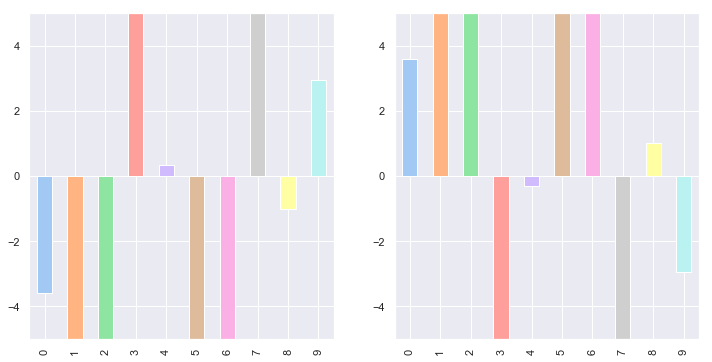

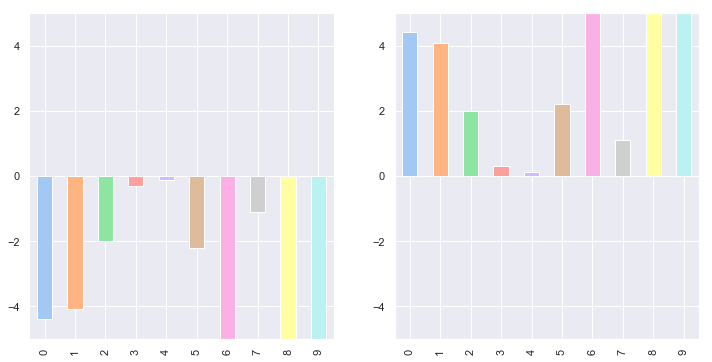

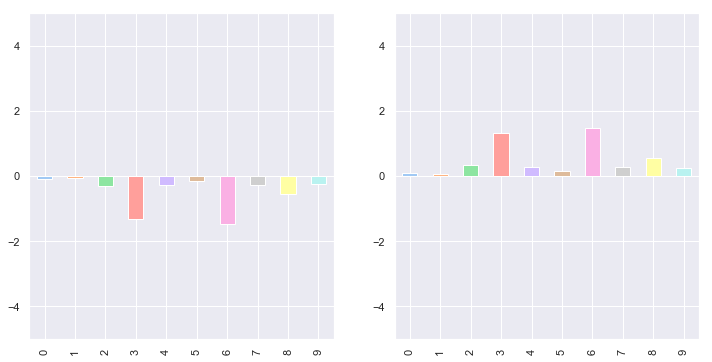

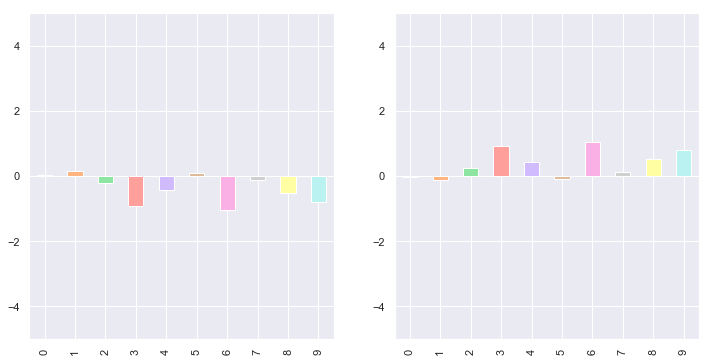

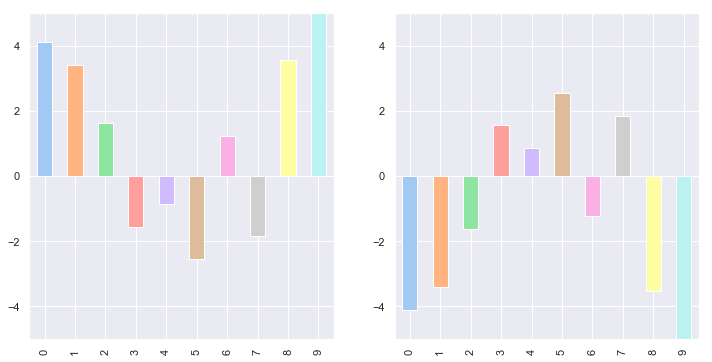

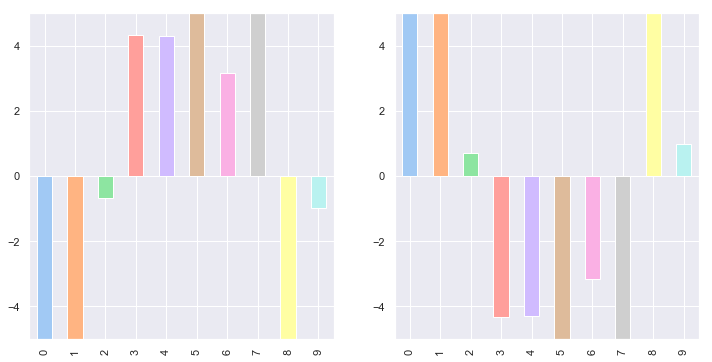

In [91]:
for element in newdf1.columns[2:]:
    print element
    avg= (newdf1[element]+newdf2[element])/2.0
    diff1 = 100.*(newdf1[element]-avg)/avg
    diff2 = 100.*(newdf2[element]-avg)/avg
#     print diff1, diff2
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    diff1.plot(kind='bar')
    plt.ylim(-5, 5)
    plt.subplot(1, 2, 2)
    diff2.plot(kind='bar')
    plt.ylim(-5, 5)
    

In [62]:
newdf2=newdf[newdf['Station']=='G501_COMBO1_N2']
newdf2

,Station,SN,R_ROI9,R_ROI8,G_ROI5,G_ROI9,R_ROI1,B_ROI4,R_ROI3,R_ROI2,...,G_ROI6,G_ROI7,RGRatio_ROI9,RGRatio_ROI8,G_ROI2,G_ROI3,G_ROI1,B_variation_inner,R_variation_corner,G_ROI4
10,G501_COMBO1_N2,91MBA01772,77.094578,86.316278,278.337522,145.619978,436.663100,149.374189,147.173967,138.130578,...,145.065489,162.939856,0.529500,0.537078,258.779467,276.860978,724.198133,0.016811,0.013067,291.860800
11,G501_COMBO1_N2,91MBA01803,75.358033,85.265289,267.550144,138.941067,435.422367,145.318133,142.656811,134.254011,...,136.948078,154.721767,0.542400,0.546056,250.521133,267.383644,708.361311,0.020011,0.013767,288.224122
12,G501_COMBO1_N2,91MBA01805,66.060344,73.348144,253.854756,132.225022,416.256178,131.918544,138.657633,133.116522,...,144.055811,160.538844,0.499689,0.502944,267.048378,277.162111,687.071011,0.017967,0.009389,263.796478
13,G501_COMBO1_N2,91MBA01816,79.605856,81.274878,284.634711,150.925711,439.528433,138.366889,146.714689,151.027278,...,156.567700,158.312800,0.527500,0.535067,285.171822,272.943300,719.384022,0.029211,0.019244,273.451633
14,G501_COMBO1_N2,91MBA01824,74.568678,77.426156,277.348122,146.709089,429.105633,139.881967,140.182867,140.059700,...,155.737078,166.275478,0.508289,0.498311,283.055600,284.658100,716.034022,0.019244,0.017367,275.131944
15,G501_COMBO1_N2,91MBA01828,74.592289,83.715789,273.661667,142.285156,443.227922,153.068467,149.666689,138.896600,...,147.866333,165.452511,0.524300,0.528633,265.707278,287.970944,734.099000,0.011222,0.007822,296.036533
16,G501_COMBO1_N2,91NBA02091,77.586767,82.095011,271.500956,145.569200,427.186878,144.641233,148.314400,143.912233,...,148.037356,159.367611,0.532978,0.541056,265.773356,276.165878,703.730989,0.019333,0.015244,277.076867
17,G501_COMBO1_N2,91NBA02156,75.154756,79.797556,264.604167,139.198411,422.348633,134.093944,143.365911,142.911711,...,148.008989,158.450289,0.539944,0.537111,269.432811,268.202956,704.883644,0.027000,0.006456,260.495322
18,G501_COMBO1_N2,91NBA02201,73.823178,76.281844,267.892833,139.811267,420.928467,135.934533,139.396356,141.065033,...,148.294111,156.930711,0.528044,0.525244,267.505300,268.686122,706.680933,0.019289,0.010800,264.985656
19,G501_COMBO1_N2,91NBA02219,75.521378,80.944422,261.480444,137.586122,419.331333,139.549811,145.186589,141.690911,...,147.281767,161.704933,0.549011,0.536789,263.402256,274.204389,696.903433,0.015889,0.034078,273.210522


[ 1.01353335 -0.0074712 ]


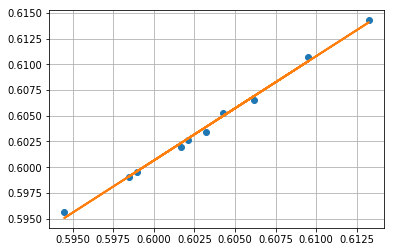

In [78]:
coeff = np.polyfit(newdf1['awb_rg'], newdf2['awb_rg'], 1)
plt.plot(newdf1['awb_rg'], newdf2['awb_rg'], 'o')
plt.plot(newdf1['awb_rg'], np.polyval(coeff, newdf1['awb_rg']), '-', lw=2)
plt.grid()
print coeff

In [68]:
np.

Index([u'Station', u'SN', u'Operator', u'Phase', u'R_ROI9', u'R_ROI8',
       u'G_ROI5', u'G_ROI9', u'R_ROI1', u'B_ROI4', u'R_ROI3', u'R_ROI2',
       u'R_ROI5', u'R_ROI4', u'R_ROI7', u'R_ROI6', u'BGRatio_ROI3',
       u'BGRatio_ROI2', u'BGRatio_ROI1', u'BGRatio_ROI7', u'BGRatio_ROI6',
       u'BGRatio_ROI5', u'BGRatio_ROI4', u'BGRatio_ROI9', u'BGRatio_ROI8',
       u'B_ROI5', u'Y_ROI4', u'Y_ROI5', u'Y_ROI6', u'uni_min_corner',
       u'R_variation_inner', u'Y_ROI1', u'Y_ROI2', u'Y_ROI3', u'Y_ROI8',
       u'Y_ROI9', u'B_ROI9', u'B_ROI8', u'uni_ROI9', u'uni_ROI8', u'uni_ROI7',
       u'uni_ROI6', u'uni_ROI5', u'uni_ROI4', u'uni_ROI3', u'uni_ROI2',
       u'B_ROI7', u'B_ROI6', u'G_ROI8', u'uni_Y_variation_corner',
       u'B_variation_corner', u'B_ROI1', u'Y_ROI7', u'awb_rg', u'B_ROI3',
       u'RGRatio_ROI6', u'RGRatio_ROI3', u'RGRatio_ROI2', u'RGRatio_ROI1',
       u'B_ROI2', u'RGRatio_ROI7', u'awb_bg', u'RGRatio_ROI5', u'RGRatio_ROI4',
       u'G_ROI6', u'G_ROI7', u'RGRatio_ROI9', u'

[0.93417075 0.03202006]


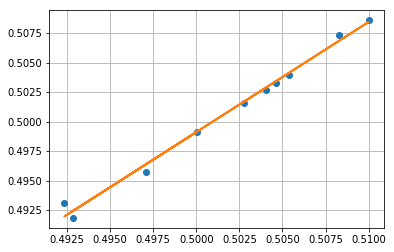

In [77]:
coeff = np.polyfit(newdf1['awb_bg'], newdf2['awb_bg'], 1)
plt.plot(newdf1['awb_bg'], newdf2['awb_bg'], 'o')
plt.plot(newdf1['awb_bg'], np.polyval(coeff, newdf1['awb_bg']), '-', lw=2)
plt.grid()
print coeff

In [88]:
def curve_fit(param):
    coeff = np.polyfit(newdf1[param], newdf2[param], 1)
    plt.plot(newdf1[param], newdf2[param], 'o')
    plt.plot(newdf1[param], np.polyval(coeff, newdf1[param]), '-', lw=2)
    plt.grid()
    plt.xlabel('newdf1('+str(param)+')')
    plt.ylabel('newdf2('+str(param)+')')
    print coeff

[  0.48985762 121.99405209]


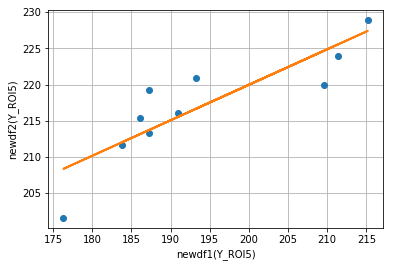

In [92]:
curve_fit('Y_ROI5')

In [94]:
newdf1[['Y_ROI1','Y_ROI1','Y_ROI1','Y_ROI1','Y_ROI1']]

,Y_ROI1,Y_ROI1,Y_ROI1,Y_ROI1,Y_ROI1
0,598.120622,598.120622,598.120622,598.120622,598.120622
1,594.462556,594.462556,594.462556,594.462556,594.462556
2,573.293356,573.293356,573.293356,573.293356,573.293356
3,599.065244,599.065244,599.065244,599.065244,599.065244
4,592.836622,592.836622,592.836622,592.836622,592.836622
5,603.014411,603.014411,603.014411,603.014411,603.014411
6,579.852689,579.852689,579.852689,579.852689,579.852689
7,581.511233,581.511233,581.511233,581.511233,581.511233
8,581.921467,581.921467,581.921467,581.921467,581.921467
9,579.558333,579.558333,579.558333,579.558333,579.558333


In [99]:
np.array(newdf1['Y_ROI1'])

array([598.12062222, 594.46255556, 573.29335556, 599.06524444,
       592.83662222, 603.01441111, 579.85268889, 581.51123333,
       581.92146667, 579.55833333])

In [98]:
np.array(newdf1['Y_ROI2'])

array([198.14724444, 179.8598    , 185.38404444, 216.0726    ,
       196.72417778, 204.1522    , 182.17695556, 188.74805556,
       185.20694444, 184.45094444])

In [104]:
np.append([np.array(newdf1['Y_ROI1']),
          np.array(newdf1['Y_ROI2']), 
          np.array(newdf1['Y_ROI3']),
          np.array(newdf1['Y_ROI4']),
          np.array(newdf1['Y_ROI5']),
          np.array(newdf1['Y_ROI6']),
          np.array(newdf1['Y_ROI7']),
          np.array(newdf1['Y_ROI8']),
          np.array(newdf1['Y_ROI9'])], axis=0)

TypeError: append() takes at least 2 arguments (2 given)

In [106]:
np.append([np.array(newdf1['Y_ROI1']),
          np.array(newdf1['Y_ROI2'])])

TypeError: append() takes at least 2 arguments (1 given)

In [108]:
type(newdf1['Y_ROI2'])

pandas.core.series.Series

In [109]:
newdf1['Y_ROI9']

0    108.509444
1     95.351678
2     88.849911
3    111.757400
4     97.505644
5    108.669711
6     93.057356
7     94.068000
8     91.506300
9     91.397244
Name: Y_ROI9, dtype: float64

In [117]:
yn1=np.append(np.array(newdf1['Y_ROI1']), np.array(newdf1['Y_ROI9']))

In [118]:
yn2=np.append(np.array(newdf2['Y_ROI1']), np.array(newdf2['Y_ROI9']))

In [119]:
coeff = np.polyfit(yn1, yn2, 1)

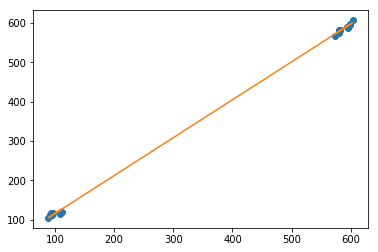

In [120]:
plt.plot(yn1,yn2,'o')
plt.plot(yn1,np.polyval(coeff,yn1), '-')

In [121]:
print coeff

[ 0.96433452 19.37705127]


In [12]:
df1 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO2_N1_phase_13_out.csv")
df2 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO2_N2_phase_13_out.csv")
df3 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO2_N3_phase_13_out.csv")
df4 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO2_N4_phase_13_out.csv")
df=pd.concat([df1, df2, df3, df4])
dfgroup=df.groupby([df['Station'], df['SN']])
newdf=dfgroup.mean().reset_index()
cols=newdf.columns
newdf1=newdf[newdf['Station']=='G501_COMBO2_N1']
newdf2=newdf[newdf['Station']=='G501_COMBO2_N2']
newdf3=newdf[newdf['Station']=='G501_COMBO2_N3']
newdf4=newdf[newdf['Station']=='G501_COMBO2_N4']

In [57]:
Newdf=newdf1[['SN']]

In [8]:
newdf1['Station'][0]

'G501_COMBO2_N1'

In [9]:
cols=newdf1.columns

In [23]:
newdf1['Station'][0]+'_'+cols[2]

'G501_COMBO2_N1_SFR_60IH_TL_V'

In [82]:
Newdf=newdf1[['SN']]
for idx in range(len(Newdf)):
    Newdf.loc[idx, newdf1['Station'].drop_duplicates().values[0]+'_'+cols[2]]=newdf1[cols[2]].values[idx]
    Newdf.loc[idx, newdf2['Station'].drop_duplicates().values[0]+'_'+cols[2]]=newdf2[cols[2]].values[idx]
    Newdf.loc[idx, newdf3['Station'].drop_duplicates().values[0]+'_'+cols[2]]=newdf3[cols[2]].values[idx]
    Newdf.loc[idx, newdf4['Station'].drop_duplicates().values[0]+'_'+cols[2]]=newdf4[cols[2]].values[idx]
Newdf

,SN,G501_COMBO2_N1_SFR_60IH_TL_V,G501_COMBO2_N2_SFR_60IH_TL_V,G501_COMBO2_N3_SFR_60IH_TL_V,G501_COMBO2_N4_SFR_60IH_TL_V
0,91MBA01772,0.508678,0.521456,0.481489,0.504022
1,91MBA01803,0.505144,0.531256,0.503967,0.507956
2,91MBA01805,0.491978,0.533900,0.460667,0.487444
3,91MBA01816,0.546533,0.523467,0.526878,0.523900
4,91MBA01824,0.567311,0.577644,0.573778,0.570922
5,91MBA01828,0.491011,0.490811,0.508622,0.495044
6,91NBA02091,0.568289,0.556289,0.560122,0.566989
7,91NBA02156,0.555722,0.559022,0.552989,0.563622
8,91NBA02201,0.500567,0.508022,0.481078,0.484667
9,91NBA02219,0.473511,0.475344,0.448056,0.451878


c:\python_27_amd64\files\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1152x720 with 0 Axes>

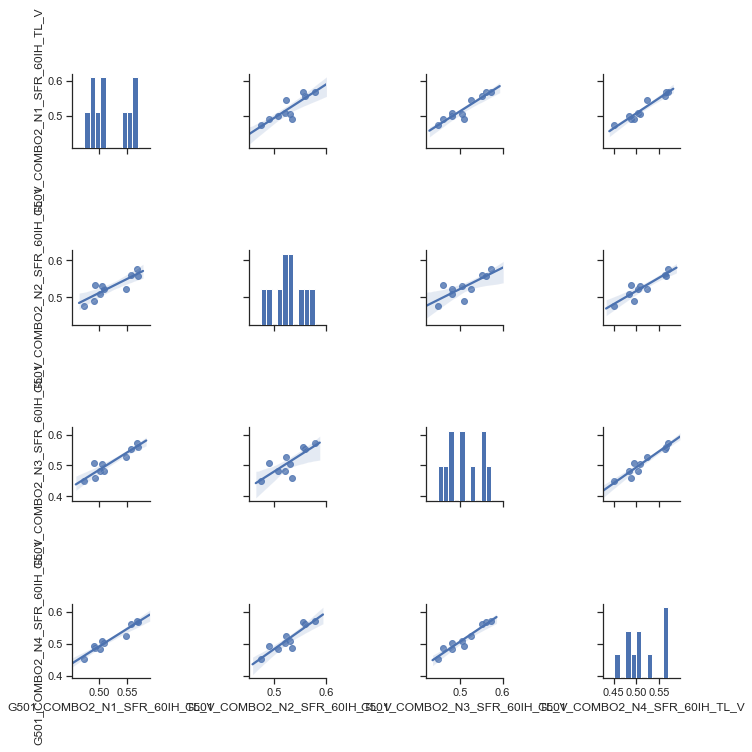

In [86]:
plt.figure(figsize=(16,10))
sns.pairplot(Newdf, kind="reg")

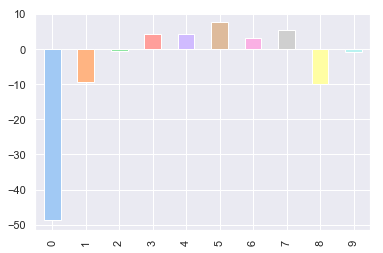

In [76]:
diff1.plot(kind='bar')

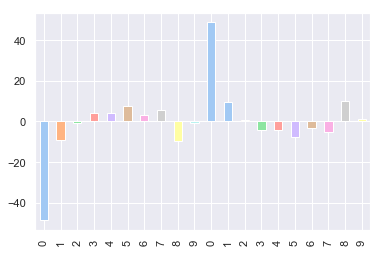

In [82]:
pd.concat([diff1,diff2]).plot(kind='bar')

TypeError: append() got an unexpected keyword argument 'axis'

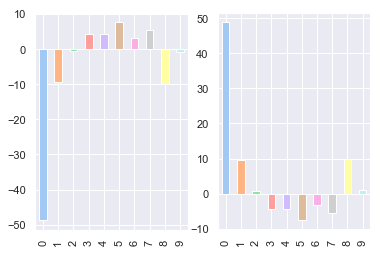

In [88]:
plt.figure()
plt.subplot(1, 2, 1)
diff1.plot(kind='bar')
plt.subplot(1, 2, 2)
diff2.plot(kind='bar')

In [92]:
df1 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO2_N1_phase_13_out.csv")
df2 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO2_N2_phase_13_out.csv")
df3 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO2_N3_phase_13_out.csv")
df4 = pd.read_csv(r"C:\Users\fanchang\python_fun\G501_COMBO2_N4_phase_13_out.csv")
df=pd.concat([df1, df2, df3, df4])
df.head()

,Station,SN,Operator,Phase,SFR_60IH_TL_V,SFR_60IH_TR_H,SFR_30IH_TL_H,SFR_30IH_TL_V,SFR_60IH_TR_V,SFR_60IH_TL_H,...,SFR_80IH_TR_V,SFR_80IH_TL_V,SFR_80IH_TL_H,SFR_80IH_TR_H,SFR_60IH_BL_H,SFR_30IH_BR_H,SFR_Center_H,SFR_80IH_BR_V,left_vert_theta,right_vert_theta
0,G501_COMBO2_N1,91MBA01772,OP1,RearSfrTestInfCollect,0.4976,0.5216,0.5694,0.6001,0.5300,0.4593,...,0.5006,0.3977,0.3933,0.4722,0.5350,0.6215,0.5857,0.5184,0.6047,0.5658
1,G501_COMBO2_N1,91MBA01772,OP1,RearSfrTestInfCollect,0.4983,0.5270,0.5889,0.6028,0.5365,0.4583,...,0.4992,0.4177,0.4077,0.4725,0.5287,0.6128,0.6013,0.5348,0.6047,0.5658
2,G501_COMBO2_N1,91MBA01772,OP1,RearSfrTestInfCollect,0.5126,0.5397,0.5834,0.6164,0.5296,0.4944,...,0.4956,0.4382,0.4164,0.4882,0.5446,0.6191,0.5927,0.4895,0.6047,0.5281
3,G501_COMBO2_N1,91MBA01772,OP2,RearSfrTestInfCollect,0.5047,0.5198,0.5748,0.6072,0.5362,0.4685,...,0.4964,0.3571,0.3884,0.4328,0.5364,0.6187,0.5822,0.5348,0.6059,0.5284
4,G501_COMBO2_N1,91MBA01772,OP2,RearSfrTestInfCollect,0.5317,0.5582,0.5816,0.6110,0.5447,0.4880,...,0.5020,0.4059,0.4139,0.4839,0.5463,0.6051,0.5774,0.5062,0.6059,0.5665


In [94]:
mean_df = df.groupby(['Station', 'SN']).mean()
mean_df.reset_index()

,Station,SN,SFR_60IH_TL_V,SFR_60IH_TR_H,SFR_30IH_TL_H,SFR_30IH_TL_V,SFR_60IH_TR_V,SFR_60IH_TL_H,SFR_60IH_BR_V,lower_horiz_theta,...,SFR_80IH_TR_V,SFR_80IH_TL_V,SFR_80IH_TL_H,SFR_80IH_TR_H,SFR_60IH_BL_H,SFR_30IH_BR_H,SFR_Center_H,SFR_80IH_BR_V,left_vert_theta,right_vert_theta
0,G501_COMBO2_N1,91MBA01772,0.508678,0.531944,0.576733,0.605367,0.534167,0.473844,0.542889,0.532978,...,0.499189,0.401411,0.394689,0.466100,0.533867,0.615767,0.585700,0.511500,0.609256,0.549256
1,G501_COMBO2_N1,91MBA01803,0.505144,0.542711,0.578400,0.596867,0.538456,0.441122,0.526222,0.121067,...,0.514633,0.497200,0.407633,0.495756,0.533167,0.594756,0.591033,0.515833,0.177333,0.372522
2,G501_COMBO2_N1,91MBA01805,0.491978,0.512844,0.627278,0.601200,0.496011,0.542456,0.544867,0.274367,...,0.454411,0.448167,0.525967,0.488178,0.535367,0.608944,0.622411,0.524500,0.370511,0.422589
3,G501_COMBO2_N1,91MBA01816,0.546533,0.495922,0.574078,0.600211,0.526689,0.539044,0.518367,0.466033,...,0.525167,0.530622,0.511689,0.494622,0.537711,0.590233,0.582156,0.469944,0.567689,0.440756
4,G501_COMBO2_N1,91MBA01824,0.567311,0.545056,0.626522,0.613656,0.529756,0.569311,0.529256,0.107678,...,0.500544,0.531744,0.540800,0.492422,0.573756,0.619222,0.598900,0.487089,0.126400,0.255867
5,G501_COMBO2_N1,91MBA01828,0.491011,0.563356,0.639667,0.626189,0.513144,0.495867,0.547289,0.091522,...,0.531633,0.483800,0.511078,0.554167,0.490067,0.609456,0.619167,0.495911,0.130889,0.091889
6,G501_COMBO2_N1,91NBA02091,0.568289,0.531833,0.609956,0.611822,0.538656,0.567333,0.520322,0.813544,...,0.547467,0.520800,0.473933,0.532533,0.559067,0.624267,0.615100,0.522844,0.792067,0.681733
7,G501_COMBO2_N1,91NBA02156,0.555722,0.572589,0.594322,0.595789,0.551122,0.541911,0.551344,0.072722,...,0.512711,0.489867,0.500322,0.505378,0.504433,0.613078,0.587478,0.507600,0.151344,0.054544
8,G501_COMBO2_N1,91NBA02201,0.500567,0.486478,0.621378,0.631200,0.474744,0.492922,0.567867,0.271844,...,0.437044,0.466989,0.473644,0.402467,0.529856,0.616789,0.637111,0.520722,0.306433,0.264333
9,G501_COMBO2_N1,91NBA02219,0.473511,0.482078,0.557267,0.591489,0.437078,0.514978,0.541367,0.193889,...,0.441889,0.487900,0.484644,0.378422,0.530478,0.616756,0.575733,0.515733,0.235344,0.193033


In [119]:
for element in mean_df.columns[2:]:
    SFR=pd.DataFrame()
    SFR['station1']=mean_df[element][0:10]
    SFR['station2']=np.array(mean_df[element][10:20])
    SFR['station3']=np.array(mean_df[element][20:30])
    SFR['station4']=np.array(mean_df[element][30:40])
#     print element
    corr = SFR.corr()
    corr.style.background_gradient(cmap='coolwarm')
    print corr
#     plt.figure()
#     sns.heatmap(corr)

          station1  station2  station3  station4
station1  1.000000  0.981038  0.943955  0.944132
station2  0.981038  1.000000  0.954424  0.958973
station3  0.943955  0.954424  1.000000  0.960706
station4  0.944132  0.958973  0.960706  1.000000
          station1  station2  station3  station4
station1  1.000000  0.835849  0.789889  0.926487
station2  0.835849  1.000000  0.635865  0.834156
station3  0.789889  0.635865  1.000000  0.865982
station4  0.926487  0.834156  0.865982  1.000000
          station1  station2  station3  station4
station1  1.000000  0.949516  0.977451  0.990362
station2  0.949516  1.000000  0.903162  0.968956
station3  0.977451  0.903162  1.000000  0.974669
station4  0.990362  0.968956  0.974669  1.000000
          station1  station2  station3  station4
station1  1.000000  0.964804  0.966804  0.979189
station2  0.964804  1.000000  0.917383  0.960020
station3  0.966804  0.917383  1.000000  0.980005
station4  0.979189  0.960020  0.980005  1.000000
          station1  

In [107]:
np.array(mean_df.SFR_60IH_TL_V[10:20])

array([0.52145556, 0.53125556, 0.5339    , 0.52346667, 0.57764444,
       0.49081111, 0.55628889, 0.55902222, 0.50802222, 0.47534444])